## Observations and Insights 

In [37]:
# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

# 1) Propriva has the least number of mice trial the drug teatment, therefore the results may be less accurate on a larger scale.

# 2) Capomulin has the most number of mice trial the drug teatment, indicating it would have a more accurate result when put on a larger scale. 
#       In addition, the linear progression of the tumor volume over time shows the tumour size reducing dramaticly, 
#       indicating the drug treatment is successful in it's goal to reduce tumour size.
#       the line graph shows a 'strong', 'negative' association between timepoint and tumour volume. 
#       - Strong association meaning a change in the timepoint variable is associated with a change in the tumour volume.
#       - Negative association meaning an increase in the timepoint variable is associated with a reduction in the tumour volume.
#       - In the case of this testing of treatments on brain tumours, we would consider a 'negative association' a good thing.

# 3) Infubinol may be considered the least effective or least prepared treatment for release as the number of mice tested was relatively low,
#       the mean Final Tumor Volume was the highest compared to all other treatments in the data,
#       furthermore, the mean tumour volume would be effected by the outlier, indicating the drug is more effective than it truely is.
#       the outlier mouse only has data from 2 time points and as such is not a necessarily clean or true indicator of the treatment results over time.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from matplotlib.colors import ListedColormap
import random


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
# study_data_complete

In [39]:
# Checking the number of mice.
total_number_of_mice_raw_data = len(study_data_complete["Mouse ID"].unique())
total_number_of_mice_raw_data

249

In [40]:
# what are the unique time points?
unique_time_points = study_data_complete["Timepoint"].unique()
unique_time_points

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ID_and_timepoint = study_data_complete.loc[study_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse_ID_and_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete_clean = study_data_complete.drop_duplicates(["Mouse ID", "Timepoint"])
study_data_complete_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# use groupby function to calculate all required statistics
study_data_complete_clean_summary = study_data_complete_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# re-align the headings so the columns headings can be re-named
study_data_complete_clean_summary.columns = study_data_complete_clean_summary.columns.droplevel(0)
study_data_complete_clean_summary.rename(columns={"mean": "Tumor Volume Mean (mm3)","median": "Tumor Volume Median (mm3)", "var": "Tumor Volume Variance (mm3)", "std": "Tumor Volume Standard Deviation (mm3)", "sem": "Tumor Volume SEM",}, inplace=True)

study_data_complete_clean_summary.round(2)

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number Of Mice For Each Treatment Throughout The Course Of The Study')

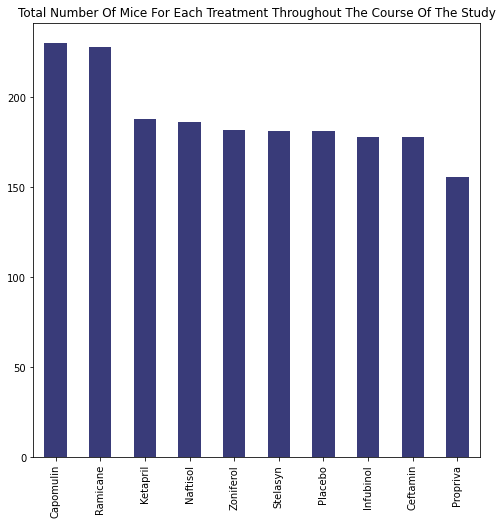

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

study_data_complete_clean['Drug Regimen'].value_counts().plot(kind='bar', colormap='tab20b', figsize=(8,8))
plt.title("Total Number Of Mice For Each Treatment Throughout The Course Of The Study")


Text(0.5, 1.0, 'Total Number Of Mice For Each Treatment Throughout The Course Of The Study')

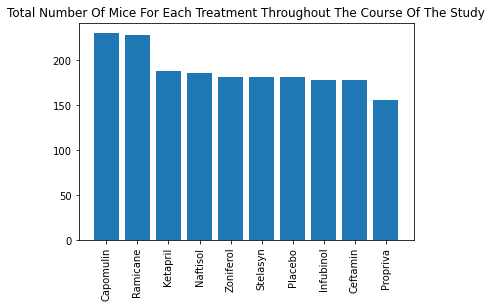

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_regiment_counts = study_data_complete_clean['Drug Regimen'].value_counts()
plt.bar(drug_regiment_counts.index, drug_regiment_counts)
plt.xticks(rotation=90)
plt.title("Total Number Of Mice For Each Treatment Throughout The Course Of The Study")

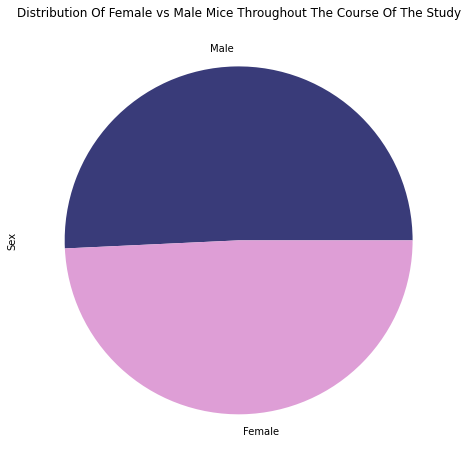

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
study_data_complete_clean['Sex'].value_counts().plot(kind='pie', colormap='tab20b', figsize=(8,8), title='Distribution Of Female vs Male Mice Throughout The Course Of The Study')

Text(0.5, 1.0, 'Distribution Of Female vs Male Mice Throughout The Course Of The Study')

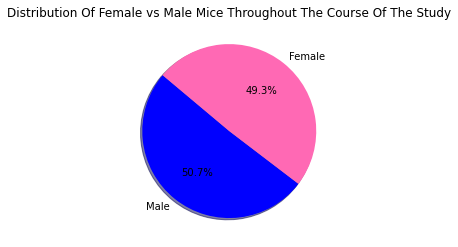

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

number_of_male_mice = len(study_data_complete_clean.loc[study_data_complete_clean["Sex"] == "Male"])
number_of_male_mice

number_of_female_mice = len(study_data_complete_clean.loc[study_data_complete_clean["Sex"] == "Female"])
number_of_female_mice

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [number_of_male_mice, number_of_female_mice]

# The colors of each section of the pie chart
colors = ["blue", "hotpink"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution Of Female vs Male Mice Throughout The Course Of The Study")

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe
max_time_point_mouse = study_data_complete_clean.groupby("Mouse ID").agg(max_timepoint=('Timepoint','max'))
max_time_df = pd.merge(study_data_complete_clean, max_time_point_mouse, on="Mouse ID")

# get the tumor volume at the last timepoint
max_time_df = max_time_df[max_time_df["Timepoint"] == max_time_df["max_timepoint"]]
max_time_df = max_time_df[max_time_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])]
# max_time_df = max_time_df[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "max_timepoint"]]

# print to review the new dataframe
max_time_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1792,x822,Ceftamin,Male,3,29,45,61.386660,3,45
1808,y163,Infubinol,Female,17,27,45,67.685569,3,45
1840,y769,Ceftamin,Female,6,27,45,68.594745,4,45
1850,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

for treatment in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    # Get the tumor volume for each mouse at the last timepoint for each treatment
    tumor_vol_df = max_time_df.loc[max_time_df["Drug Regimen"] == treatment]
    tumor_vol_list.append(tumor_vol_df["Tumor Volume (mm3)"].values)


In [50]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
outlier_df = []

for treatment in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    # Get the tumor volume for each mouse at the last timepoint for each treatment
    tumor_vol_df = max_time_df.loc[max_time_df["Drug Regimen"] == treatment]
    # Calculate the IQR
    IQR = np.subtract(*np.percentile(tumor_vol_df["Tumor Volume (mm3)"], [75, 25]))
    # Calculate the lower and upper bounds for the outliers
    lower_bound = tumor_vol_df["Tumor Volume (mm3)"].quantile(0.25) - 1.5 * IQR
    upper_bound = tumor_vol_df["Tumor Volume (mm3)"].quantile(0.75) + 1.5 * IQR
    # Calculate the number of outliers
    num_outliers = len(tumor_vol_df.loc[(tumor_vol_df["Tumor Volume (mm3)"] < lower_bound) | (tumor_vol_df["Tumor Volume (mm3)"] > upper_bound)])

    if num_outliers > 0:
        # grab the data
        outlier_df.append(tumor_vol_df.loc[(tumor_vol_df["Tumor Volume (mm3)"] < lower_bound) | (tumor_vol_df["Tumor Volume (mm3)"] > upper_bound)])

    # Print the number of outliers
    print("There are {} outliers for {}".format(num_outliers, treatment))
    


There are 0 outliers for Capomulin
There are 0 outliers for Ramicane
There are 1 outliers for Infubinol
There are 0 outliers for Ceftamin


In [51]:
# Findning further info on outlier mouse
outlier_df = pd.concat(outlier_df)
outlier_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
669,c326,Infubinol,Female,18,25,5,36.321346,0,5


In [52]:
# Findning further info on outlier mouse
outlier_mouse_full_df = study_data_complete_clean.loc[study_data_complete_clean["Mouse ID"] == "c326"]
outlier_mouse_full_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
668,c326,Infubinol,Female,18,25,0,45.000000,0
669,c326,Infubinol,Female,18,25,5,36.321346,0


Text(0, 0.5, 'Tumor Volume (mm3)')

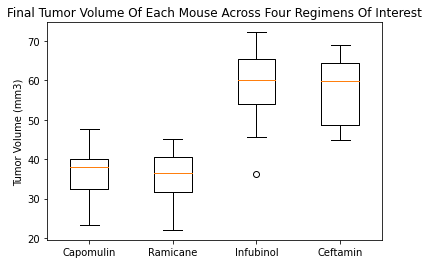

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_list)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title("Final Tumor Volume Of Each Mouse Across Four Regimens Of Interest")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [55]:
# start by creating new dataframe for only ["Drug Regimen"] == "Capomulin"
capomulin_treatments = study_data_complete_clean.loc[study_data_complete_clean["Drug Regimen"] == "Capomulin"]
# capomulin_treatments

# re-arrange columns
capomulin_treatments = capomulin_treatments[['Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

# group dataframe by Timepoint
capomulin_treatments_timepoints_grouped = capomulin_treatments.groupby(["Timepoint"], as_index=False)

capomulin_treatments_timepoints_df = capomulin_treatments_timepoints_grouped.mean()
capomulin_treatments_timepoints_df.round(2)

,Timepoint,Tumor Volume (mm3),Weight (g)
0,0,45.00,20.12
1,5,44.27,20.12
2,10,43.08,20.12
3,15,42.06,20.00
4,20,40.72,19.78
5,25,39.94,19.91
6,30,38.77,19.91
7,35,37.82,19.91
8,40,36.96,19.86
9,45,36.24,19.86


Text(0, 0.5, 'Tumor Volume (mm3)')

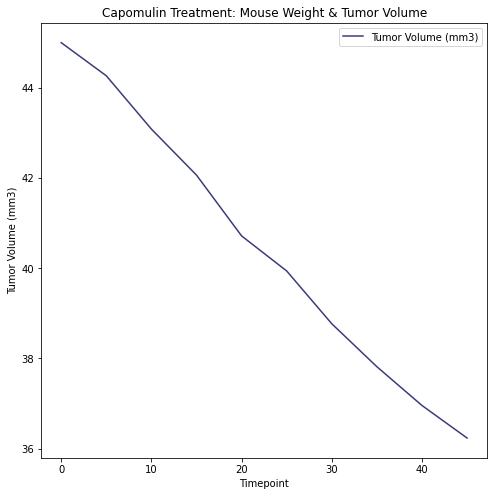

In [56]:
# Generate a line plot of time point versus tumor volume for THE AVERAGE RESULTS of all mice treated with Capomulin for a starting refference
capomulin_treatments_timepoints_df.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", figsize=(8,8), colormap='tab20b', title="Capomulin Treatment: Mouse Weight & Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")

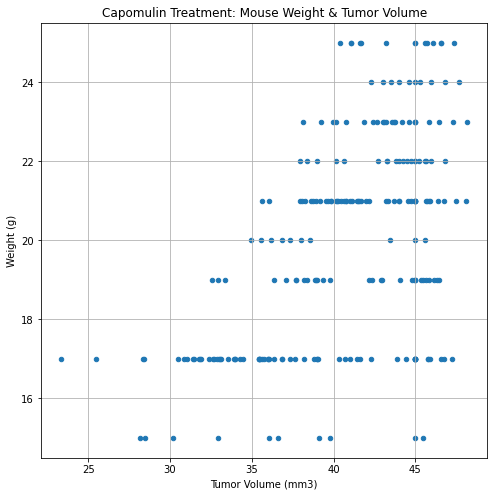

In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_treatments.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", 
grid=True, figsize=(8,8), title="Capomulin Treatment: Mouse Weight & Tumor Volume")

In [58]:
# # Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
# I have selected a seed so it is the same random number every time the cell is run.
random.seed(2)

all_mouse_ids = study_data_complete_clean[study_data_complete_clean["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
mouse_id_random = random.choice(all_mouse_ids)
print(mouse_id_random)

x401


Text(0.5, 1.0, 'Test Subject X401 (Receiving Capomulin Treatment): Mouse Weight & Tumor Volume')

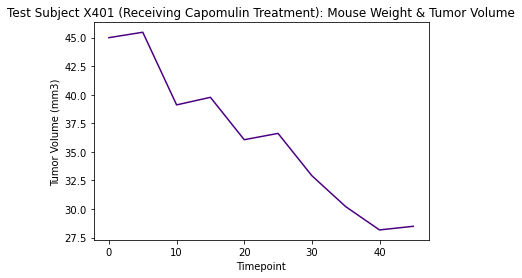

In [59]:
selected_mouse = study_data_complete_clean.loc[(study_data_complete_clean["Drug Regimen"] == "Capomulin") & (study_data_complete_clean["Mouse ID"] == mouse_id_random)]
plt.plot(selected_mouse["Timepoint"], selected_mouse["Tumor Volume (mm3)"], color='indigo')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Test Subject X401 (Receiving Capomulin Treatment): Mouse Weight & Tumor Volume")

# please note: this is a very similar result to the average mouse results in the above line graph. 

## Correlation and Regression

In [60]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Using the capomulin_treatments dataframe.

# Calculate the correlation coefficient 
corr = np.corrcoef(capomulin_treatments["Tumor Volume (mm3)"], capomulin_treatments["Weight (g)"])[1][0]

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_treatments["Tumor Volume (mm3)"], capomulin_treatments["Weight (g)"])

# Print the correlation coefficient and linear regression model 
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corr}")
print(f"The slope of the regression line is {round(slope,2)}")
print(f"The intercept of the regression line is {round(intercept,2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.525699555207717
The slope of the regression line is 0.29
The intercept of the regression line is 8.27
